# Optimization - gradient descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import layers

## load cifar-10

In [2]:
from data_utils import load_CIFAR10
cifar10_dir = '/Users/mahrokh/Desktop/cifar-10-batches-py'
x_train, y_train, x_test, y_test = load_CIFAR10(cifar10_dir)
print('Training data shape:      ',x_train.shape )
print('Training labels shape:    ',y_train.shape )
print('Test data shape:          ',x_test.shape )
print('Test labels shape:        ',y_test.shape )

Training data shape:       (50000, 32, 32, 3)
Training labels shape:     (50000,)
Test data shape:           (10000, 32, 32, 3)
Test labels shape:         (10000,)


## spiliting data

In [3]:
num_training = 49000
num_validation = 1000
num_test = 10000
num_dev = 500

# our validation set
mask = range(num_training, num_training + num_validation)
x_val = x_train[mask]
y_val = y_train[mask]

# our training set
mask = range(num_training)
x_train = x_train[mask]
y_train = y_train[mask]

# our test set
mask = range(num_test)
x_test = x_test[mask]
y_test = y_test[mask]

# our development data
mask = np.random.choice(num_training, num_dev)
x_dev = x_train[mask]
y_dev = y_train[mask]

print('train data:        ',x_train.shape)
print('train labels:      ',y_train.shape)
print('Validation data:   ',x_val.shape)
print('Validation labels: ',y_val.shape)
print('test data:         ',x_test.shape)
print('test labels:       ',y_test.shape)

train data:         (49000, 32, 32, 3)
train labels:       (49000,)
Validation data:    (1000, 32, 32, 3)
Validation labels:  (1000,)
test data:          (10000, 32, 32, 3)
test labels:        (10000,)


## Reshape data to 2D array

In [7]:
x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_val = np.reshape(x_val, (x_val.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))
print('training shape 2d:    ', x_train.shape)
print('Validation data 2d:   ', x_val.shape)
print('test data 2d:         ', x_test.shape)

training shape 2d:     (49000, 3072)
Validation data 2d:    (1000, 3072)
test data 2d:          (10000, 3072)


## Subtract the mean

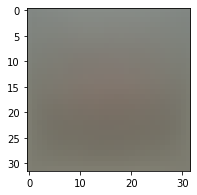

In [8]:
mean_image = np.mean(x_train, axis=0)
plt.figure(figsize=(3,3))
plt.imshow(mean_image.reshape(32,32,3).astype('uint8'));

In [40]:
N = x_train.shape[0]           #number of training data
D = np.prod(x_train.shape[1:]) #number of features
c = 10                         #number of classes

# inite parameters
w = 0.0001 * np.random.randn(D, c)
b = np.zeros(c,)